In [1]:
from __future__ import division, print_function, unicode_literals
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tugas_akhir_tanggal"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(42)
#load the data
dt = pd.read_csv('kereta api - rangkuman Data kereta 396a.csv')
dt.head()

,#,Tanggal,Penyebab,Akibat,Daop,Lokasi_1,Lokasi_2,KM,Andil,Keterangan
0,1,02/02/2019,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,2,-,Purwakarta,NaN,25,tgg cetak tiket
1,2,02/02/2019,TAKTIS MASINIS,MENGURANGI KELAMBATAN,2,Sukatani,Plered,NaN,-5,taktis masinis pwk - pld
2,3,02/02/2019,TAKTIS MASINIS,MENGURANGI KELAMBATAN,2,Cisomang,Cikadongdong,NaN,-4,taktis masinis sut- pld
3,4,02/02/2019,TAKTIS PPKA,MENGURANGI KELAMBATAN,2,-,Cikadongdong,NaN,-4,kantong waktu cd
4,5,02/02/2019,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,2,Cikadongdong,Rendeh,137+4 sd 139+0,1,taspat 40 km/jam


In [3]:
z = 0
array_no_kereta = []
while (z < len(dt)):
    no_kereta = 395
    array_no_kereta.append(no_kereta) 
    z+=1
    
dt['No Kereta'] = array_no_kereta 

In [4]:
z=0
while (z < len(dt)):
    if(dt.Lokasi_1[z] == '-'):
        dt.Lokasi_1[z] = dt.Lokasi_2[z]
    z+=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
dk = dt.drop(['Daop', 'KM', 'Keterangan'], axis=1)
df = dk.dropna()

In [6]:
df.Tanggal.dtype

dtype('O')

In [7]:
df.Tanggal = pd.to_datetime(df['Tanggal'])

In [8]:
df

,#,Tanggal,Penyebab,Akibat,Lokasi_1,Lokasi_2,Andil,No Kereta
0,1,2019-02-02,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,Purwakarta,Purwakarta,25,395
1,2,2019-02-02,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Sukatani,Plered,-5,395
2,3,2019-02-02,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Cikadongdong,-4,395
3,4,2019-02-02,TAKTIS PPKA,MENGURANGI KELAMBATAN,Cikadongdong,Cikadongdong,-4,395
4,5,2019-02-02,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,395
...,...,...,...,...,...,...,...,...
349,350,2019-03-31,PEKERJAAN JEMBATAN,PEMASANGAN TASPAT,Cimekar,Rancaekek,2,395
350,351,2019-03-31,TUNGGU PENYUSULAN,LAMBAT DI STASIUN ANTARA,Cicalengka,Cicalengka,10,395
351,352,2019-03-31,TUNGGU PERSILANGAN,LAMBAT DI STASIUN ANTARA,Cicalengka,Cicalengka,9,395
352,353,2019-03-31,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Lebakjero,Leles,-6,395


In [9]:
type(df.Tanggal[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
#https://github.com/dc-aichara/DS-ML-Public/blob/master/Medium_Files/Date_Time.ipynb


print('Month :',df.Tanggal[0].month) # Get month
print('Day of Month :',df.Tanggal[0].day) # Get day of month
print('Day of Week :',df.Tanggal[0].weekday()) # Get weekday 0-6 --> Monday to Sunday
print(df.Tanggal[0].week)
#print('Hour :',df.Tanggal[0].hour)  # Get hour 
#print('Minutes :',df.Tanggal[0].minute) # Get minutes
#print('Seconds :',df.Tanggal[0].second) # Get Seconds


Month : 2
Day of Month : 2
Day of Week : 5
5


In [11]:
array_month = [df.Tanggal[0].month]
array_hari = [df.Tanggal[0].day]
array_nama_hari = [df.Tanggal[0].weekday()]
array_minggu_ke = [df.Tanggal[0].week]
z=1
while (z < len(df)):
    bulan = df.Tanggal[z].month
    array_month.append(bulan)
    hari = df.Tanggal[z].day
    array_hari.append(hari)
    nama_hari = df.Tanggal[z].weekday()
    array_nama_hari.append(nama_hari)
    minggu_ke = df.Tanggal[z].week
    array_minggu_ke.append(minggu_ke)
    z+=1
    

In [12]:
df['Bulan Ke'] = array_month 
df['Hari_Ke'] = array_hari
df['Nama Hari'] = array_nama_hari 
df['Minggu Ke'] = array_minggu_ke

In [13]:
#date = datetime(2019,10,4) # create a datetime object
#for x in range(6):
#ketika dia pindah tanggal, mulai lagi dari 0
#andil_tiga = andil dua yang dijadikan x untuk prediksi andil stasiun berikutnya
j = 0
i = 0
k = 0
array_andil_bulan = []
array_andil_hari = []
array_andil_per_hari = []
array_andil_nama_hari = []
array_andil_minggu_ke = []
array_andil_dua = [df.Andil[0]]
array_andil_tiga = [df.Andil[0]]
date_sekarang = df.Tanggal[0] 
cek_date = df.Tanggal[0]
while (i < len(df)): #tanggal yang terkahir belum bisa masuk
    while (date_sekarang == cek_date) :
        j += 1
        i+=1
        if(j<len(df)):
            date_sekarang = df.Tanggal[j] 
            cek_date = df.Tanggal[j-1]
            if (date_sekarang == cek_date):
                andil_tiga = array_andil_dua[j - 1]
                array_andil_tiga.append(andil_tiga)
                andil_dua = df.Andil[j] + array_andil_tiga[j] #andil 3
                array_andil_dua.append(andil_dua)
        else:
            break
    if(i<len(df)):#untuk masuk ke tanggal berikutnya
        array_andil_per_hari.append(andil_dua)#menghitung keterlambatan per hari
        bulan_sekarang = df.Tanggal[j-1].month
        tanggal_sekarang = df.Tanggal[j-1].day
        nama_hari_sekarang = df.Tanggal[j-1].weekday()
        minggu_ke_sekarang = df.Tanggal[j-1].week
        array_andil_bulan.append(bulan_sekarang)
        array_andil_hari.append(tanggal_sekarang)
        array_andil_nama_hari.append(nama_hari_sekarang)
        array_andil_minggu_ke.append(minggu_ke_sekarang)
        ##################################################
        date_sekarang = df.Tanggal[j] #untuk pindah tanggal
        cek_date = df.Tanggal[j]
        nilai_tiga = df.Andil[j]
        array_andil_tiga.append(nilai_tiga)
        nilai_dua = df.Andil[j]  #andil 3
        array_andil_dua.append(nilai_dua)
        k=k+1

In [14]:
array_andil_bulan

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [15]:
dt_andil = pd.DataFrame({
   'Hari Ke': array_andil_hari,
   'Bulan Ke': array_andil_bulan,
    'Nama_Hari': array_andil_nama_hari,
    'Minggu_Ke':array_andil_minggu_ke,
    'Andil': array_andil_per_hari
})

In [16]:
dt_andil.head()

,Hari Ke,Bulan Ke,Nama_Hari,Minggu_Ke,Andil
0,2,2,5,5,48
1,3,2,6,5,15
2,4,2,0,6,23
3,5,2,1,6,20
4,7,2,3,6,13


In [17]:
array_andil_nama_hari

[5,
 6,
 0,
 1,
 3,
 4,
 5,
 0,
 1,
 3,
 4,
 5,
 6,
 0,
 3,
 4,
 6,
 0,
 1,
 5,
 6,
 0,
 2,
 3,
 4,
 5,
 0,
 1,
 3,
 4,
 5,
 6,
 1,
 3,
 0,
 2]

In [18]:
array_andil_tiga

[25,
 25,
 20,
 16,
 12,
 13,
 15,
 11,
 9,
 10,
 4,
 6,
 0,
 2,
 0,
 29,
 55,
 53,
 1,
 1,
 2,
 4,
 5,
 -1,
 0,
 20,
 1,
 1,
 3,
 5,
 6,
 8,
 -1,
 6,
 25,
 1,
 1,
 2,
 4,
 12,
 14,
 23,
 1,
 1,
 7,
 8,
 10,
 4,
 6,
 0,
 2,
 21,
 17,
 3,
 3,
 4,
 5,
 7,
 1,
 3,
 36,
 28,
 32,
 34,
 4,
 4,
 5,
 6,
 8,
 10,
 12,
 0,
 27,
 4,
 4,
 5,
 6,
 8,
 9,
 21,
 2,
 2,
 10,
 12,
 30,
 17,
 14,
 12,
 10,
 14,
 15,
 1,
 1,
 2,
 4,
 6,
 8,
 14,
 8,
 8,
 4,
 5,
 6,
 8,
 10,
 12,
 21,
 1,
 1,
 2,
 4,
 6,
 8,
 19,
 1,
 1,
 2,
 3,
 4,
 5,
 33,
 39,
 35,
 1,
 1,
 2,
 4,
 6,
 8,
 16,
 23,
 1,
 1,
 2,
 4,
 6,
 8,
 0,
 17,
 5,
 5,
 6,
 7,
 9,
 11,
 13,
 1,
 1,
 2,
 4,
 6,
 8,
 17,
 1,
 1,
 3,
 4,
 6,
 8,
 10,
 22,
 37,
 29,
 25,
 1,
 1,
 2,
 4,
 6,
 8,
 13,
 26,
 1,
 1,
 2,
 4,
 6,
 8,
 0,
 35,
 2,
 2,
 3,
 4,
 7,
 9,
 0,
 2,
 17,
 24,
 5,
 34,
 1,
 1,
 2,
 4,
 6,
 11,
 13,
 1,
 7,
 14,
 21,
 15,
 8,
 8,
 9,
 10,
 12,
 14,
 18,
 14,
 16,
 -4,
 8,
 22,
 37,
 33,
 28,
 1,
 1,
 2,
 4,
 6,
 8,
 0,
 9,
 18,
 15,
 1

In [19]:
i

354

In [20]:
len(df)

354

In [21]:
df['Andil2'] = array_andil_dua

In [22]:
df['Andil3'] = array_andil_tiga

In [23]:
df.head()

,#,Tanggal,Penyebab,Akibat,Lokasi_1,Lokasi_2,Andil,No Kereta,Bulan Ke,Hari_Ke,Nama Hari,Minggu Ke,Andil2,Andil3
0,1,2019-02-02,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,Purwakarta,Purwakarta,25,395,2,2,5,5,25,25
1,2,2019-02-02,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Sukatani,Plered,-5,395,2,2,5,5,20,25
2,3,2019-02-02,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Cikadongdong,-4,395,2,2,5,5,16,20
3,4,2019-02-02,TAKTIS PPKA,MENGURANGI KELAMBATAN,Cikadongdong,Cikadongdong,-4,395,2,2,5,5,12,16
4,5,2019-02-02,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,395,2,2,5,5,13,12


In [24]:
df.out = np.savetxt("out_395.csv", df, delimiter=",", fmt="%s", header="No,Tanggal,Penyebab,Akibat,Lokasi 1,Lokasi 2,Andil,No Kereta,Bulan Ke,Hari Ke,Nama Hari,Minggu Ke,Andil2,Andil3")

In [25]:
df_out=pd.read_csv('out_395.csv', sep=',',header=0)
df_out.head()

,# No,Tanggal,Penyebab,Akibat,Lokasi 1,Lokasi 2,Andil,No Kereta,Bulan Ke,Hari Ke,Nama Hari,Minggu Ke,Andil2,Andil3
0,1,2019-02-02 00:00:00,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,Purwakarta,Purwakarta,25,395,2,2,5,5,25,25
1,2,2019-02-02 00:00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Sukatani,Plered,-5,395,2,2,5,5,20,25
2,3,2019-02-02 00:00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Cikadongdong,-4,395,2,2,5,5,16,20
3,4,2019-02-02 00:00:00,TAKTIS PPKA,MENGURANGI KELAMBATAN,Cikadongdong,Cikadongdong,-4,395,2,2,5,5,12,16
4,5,2019-02-02 00:00:00,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,395,2,2,5,5,13,12


In [26]:
df_corr = df.corr()
df_corr["Andil2"].sort_values(ascending = False)

Andil2       1.000000
Andil3       0.807267
Andil        0.352628
Bulan Ke     0.107701
#            0.098911
Minggu Ke    0.076053
Nama Hari    0.026223
Hari_Ke     -0.026148
No Kereta         NaN
Name: Andil2, dtype: float64

In [27]:
df_corr["Andil"].sort_values(ascending = False)

Andil        1.000000
Andil2       0.352628
Nama Hari    0.016486
Hari_Ke     -0.001775
#           -0.028135
Minggu Ke   -0.030339
Bulan Ke    -0.032074
Andil3      -0.246643
No Kereta         NaN
Name: Andil, dtype: float64

In [28]:
dt["Penyebab"].value_counts()

PEMASANGAN TASPAT (PRASARANA)                123
TAKTIS MASINIS                                51
TUNGGU PERSILANGAN                            45
TAKTIS PPKA                                   38
PEKERJAAN JEMBATAN                            36
GEOMETRI (JJ)                                 20
TUNGGU PENYUSULAN                             19
ALAM DAN EKSTERNALITAS                         7
PEMINDAHAN PERSILANGAN                         7
ANJLOGAN (EKSTERNALITAS)                       3
GANGGUAN SINYAL (PERSINYALAN ELEKTRIK)         2
TUNGGU RANGKAIAN (ALAM DAN EKSTERNALITAS)      2
ANTRIAN TIKET                                  1
Name: Penyebab, dtype: int64

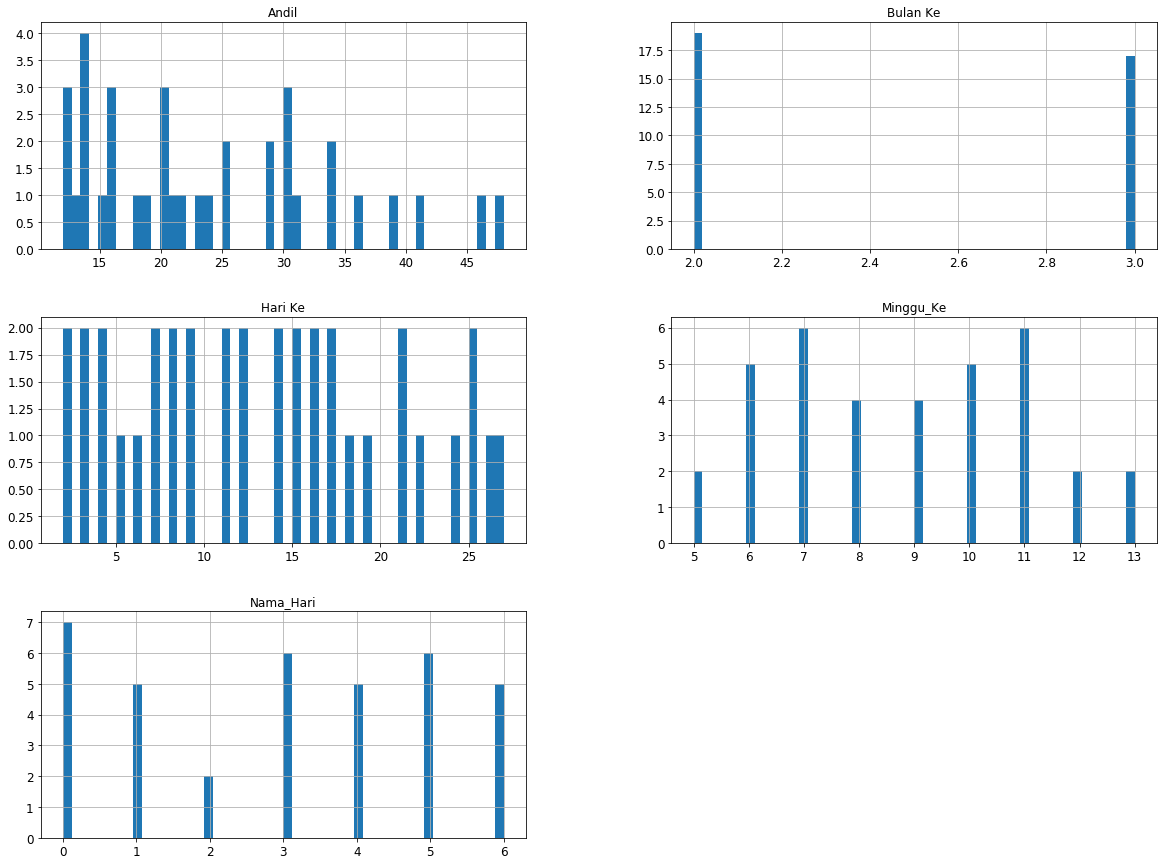

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
dt_andil.hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = df_out[['Lokasi 2']]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[19.],
       [18.],
       [ 3.],
       [ 3.],
       [21.],
       [21.],
       [17.],
       [ 6.],
       [ 0.],
       [ 0.]])

In [31]:
ordinal_encoder.categories_

[array(['Bandung', 'Cibatu', 'Cicalengka', 'Cikadongdong', 'Cikudapateuh',
        'Cilame', 'Cimahi', 'Cimekar', 'Gedebage', 'Haurpugur',
        'Karangsari', 'Kiaracondong', 'Lebakjero', 'Leles', 'Leuwigoong',
        'Maswati', 'Nagreg', 'Padalarang', 'Plered', 'Purwakarta',
        'Rancaekek', 'Rendeh', 'Sasaksaat', 'Sukatani'], dtype=object)]

In [32]:
df_out['Encoded_Lokasi_2'] = housing_cat_encoded

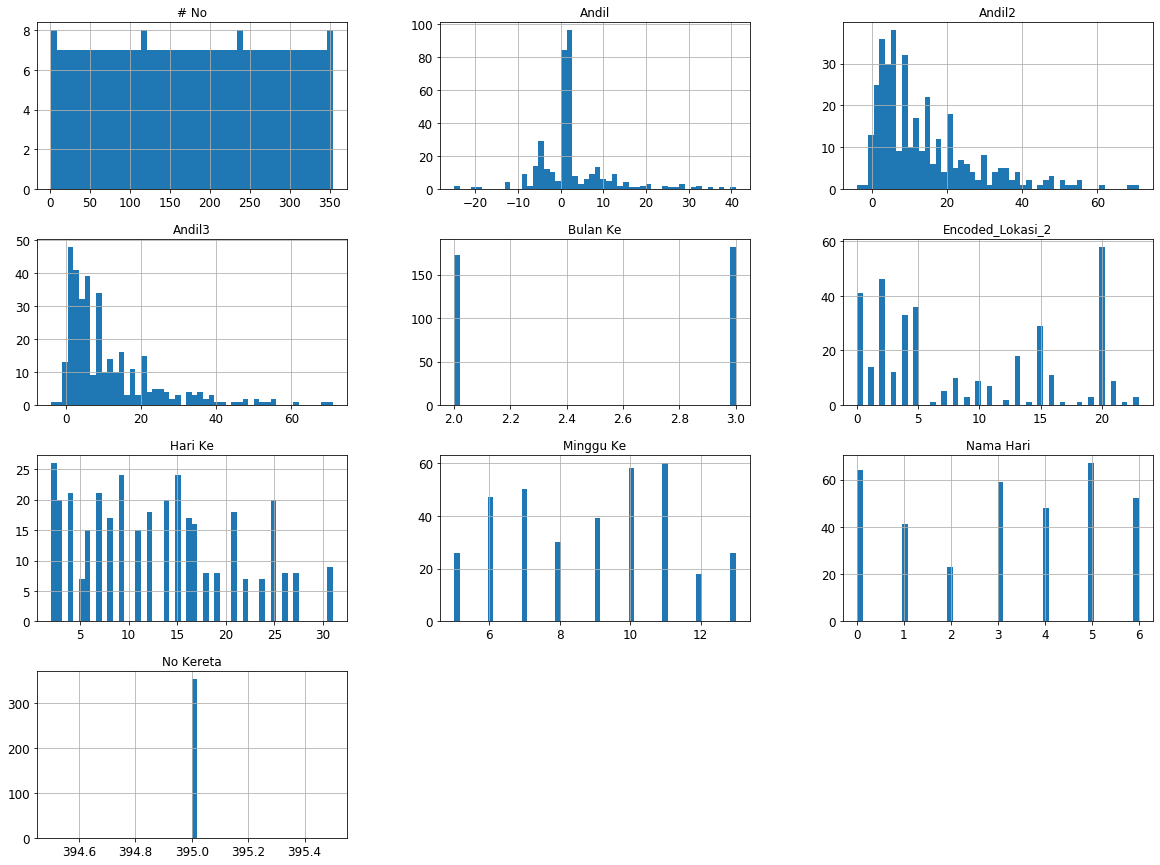

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
df_out.hist(bins=50, figsize=(20,15))
plt.show()

In [34]:
df_out

,# No,Tanggal,Penyebab,Akibat,Lokasi 1,Lokasi 2,Andil,No Kereta,Bulan Ke,Hari Ke,Nama Hari,Minggu Ke,Andil2,Andil3,Encoded_Lokasi_2
0,1,2019-02-02 00:00:00,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,Purwakarta,Purwakarta,25,395,2,2,5,5,25,25,19.0
1,2,2019-02-02 00:00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Sukatani,Plered,-5,395,2,2,5,5,20,25,18.0
2,3,2019-02-02 00:00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Cikadongdong,-4,395,2,2,5,5,16,20,3.0
3,4,2019-02-02 00:00:00,TAKTIS PPKA,MENGURANGI KELAMBATAN,Cikadongdong,Cikadongdong,-4,395,2,2,5,5,12,16,3.0
4,5,2019-02-02 00:00:00,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,395,2,2,5,5,13,12,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,350,2019-03-31 00:00:00,PEKERJAAN JEMBATAN,PEMASANGAN TASPAT,Cimekar,Rancaekek,2,395,3,31,6,13,2,0,20.0
350,351,2019-03-31 00:00:00,TUNGGU PENYUSULAN,LAMBAT DI STASIUN ANTARA,Cicalengka,Cicalengka,10,395,3,31,6,13,12,2,2.0
351,352,2019-03-31 00:00:00,TUNGGU PERSILANGAN,LAMBAT DI STASIUN ANTARA,Cicalengka,Cicalengka,9,395,3,31,6,13,21,12,2.0
352,353,2019-03-31 00:00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Lebakjero,Leles,-6,395,3,31,6,13,15,21,13.0
